In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [58]:
from google.colab import files
uploaded = files.upload()  # This will open a dialog to upload your file





Saving tips (data for regression problem).csv to tips (data for regression problem) (3).csv


In [59]:
import pandas as pd
df = pd.read_csv("/content/tips (data for regression problem) (1).csv")



In [60]:
print("Data Head:\n", df.head())
print("\nData Summary:\n", df.describe())
print("\nMissing Values:\n", df.isnull().sum())

Data Head:
    total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

Data Summary:
        total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000

Missing Values:
 total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


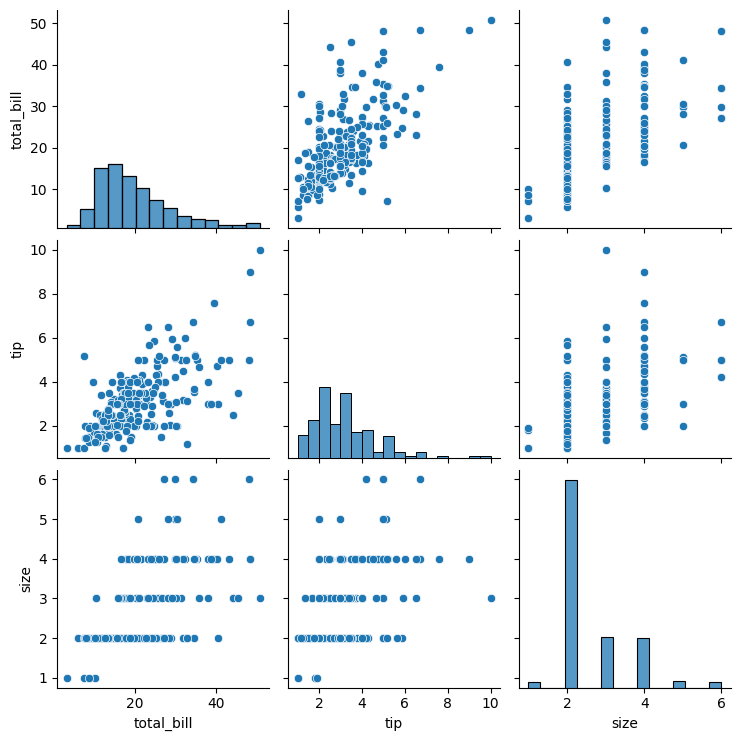

In [61]:
sns.pairplot(df)
plt.show()

In [62]:
df = pd.get_dummies(df, drop_first=True)

In [63]:
X = df.drop("tip", axis=1)
y = df["tip"]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [65]:
model_performance = {}

In [66]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(max_depth=5),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    "SVR": SVR(kernel='linear'),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

In [67]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store performance
    model_performance[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "R2 Score": r2
    }

    print(f"{model_name} Performance:\n MAE: {mae:.2f}, MSE: {mse:.2f}, R2 Score: {r2:.2f}\n")


Linear Regression Performance:
 MAE: 0.72, MSE: 0.93, R2 Score: 0.29

Ridge Regression Performance:
 MAE: 0.72, MSE: 0.93, R2 Score: 0.30

Lasso Regression Performance:
 MAE: 0.67, MSE: 0.78, R2 Score: 0.41

Decision Tree Performance:
 MAE: 0.74, MSE: 0.92, R2 Score: 0.31

Random Forest Performance:
 MAE: 0.73, MSE: 0.86, R2 Score: 0.34

SVR Performance:
 MAE: 0.70, MSE: 0.89, R2 Score: 0.33

KNN Performance:
 MAE: 0.76, MSE: 1.01, R2 Score: 0.23



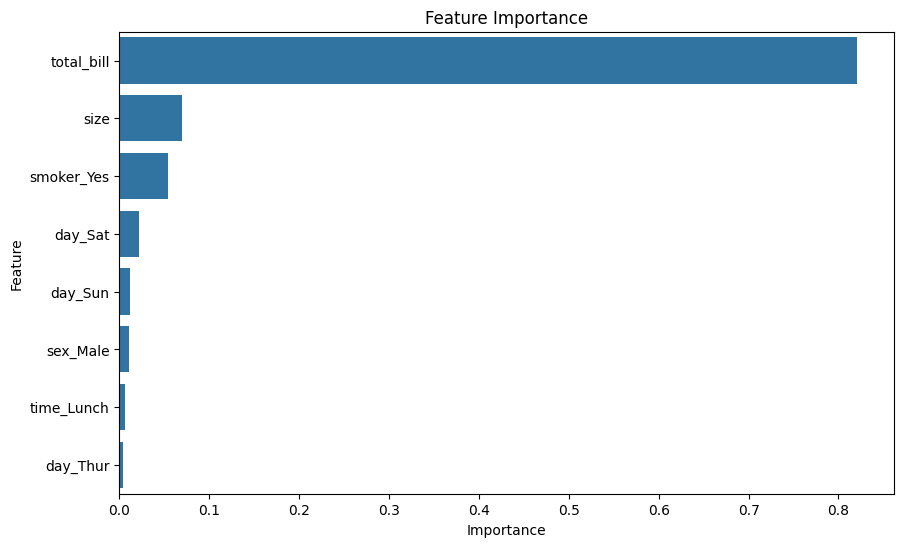

In [68]:
importances = models["Random Forest"].feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({"Feature": features, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importance")
plt.show()


In [69]:
print("Top 5 Features Impacting Tip Amounts:\n", feature_importance_df.head())


Top 5 Features Impacting Tip Amounts:
       Feature  Importance
0  total_bill    0.821151
1        size    0.069949
3  smoker_Yes    0.054297
4     day_Sat    0.021372
5     day_Sun    0.011500


In [70]:
print("Model Performance Summary:\n", model_performance)

Model Performance Summary:
 {'Linear Regression': {'MAE': 0.7171821289867403, 'MSE': 0.9318323215911068, 'R2 Score': 0.29309667441266785}, 'Ridge Regression': {'MAE': 0.7155084779067238, 'MSE': 0.926062286089933, 'R2 Score': 0.2974739182472368}, 'Lasso Regression': {'MAE': 0.6719663244064802, 'MSE': 0.7803286749553078, 'R2 Score': 0.40802983262570713}, 'Decision Tree': {'MAE': 0.7447193693693693, 'MSE': 0.9157086207988596, 'R2 Score': 0.3053283790302461}, 'Random Forest': {'MAE': 0.7292393733308291, 'MSE': 0.8642609907511729, 'R2 Score': 0.34435739737573257}, 'SVR': {'MAE': 0.7005949058478943, 'MSE': 0.8874002509301064, 'R2 Score': 0.3268035740181261}, 'KNN': {'MAE': 0.7613513513513513, 'MSE': 1.012412108108108, 'R2 Score': 0.23196752301478274}}


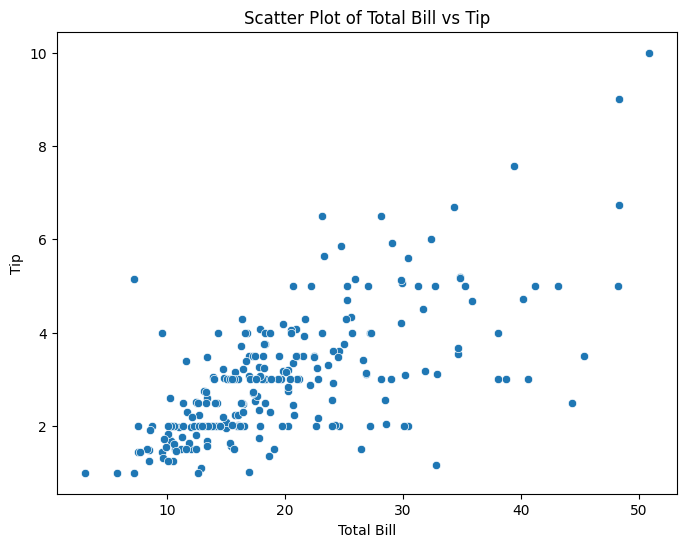

In [71]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['total_bill'], y=df['tip'])
plt.title('Scatter Plot of Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

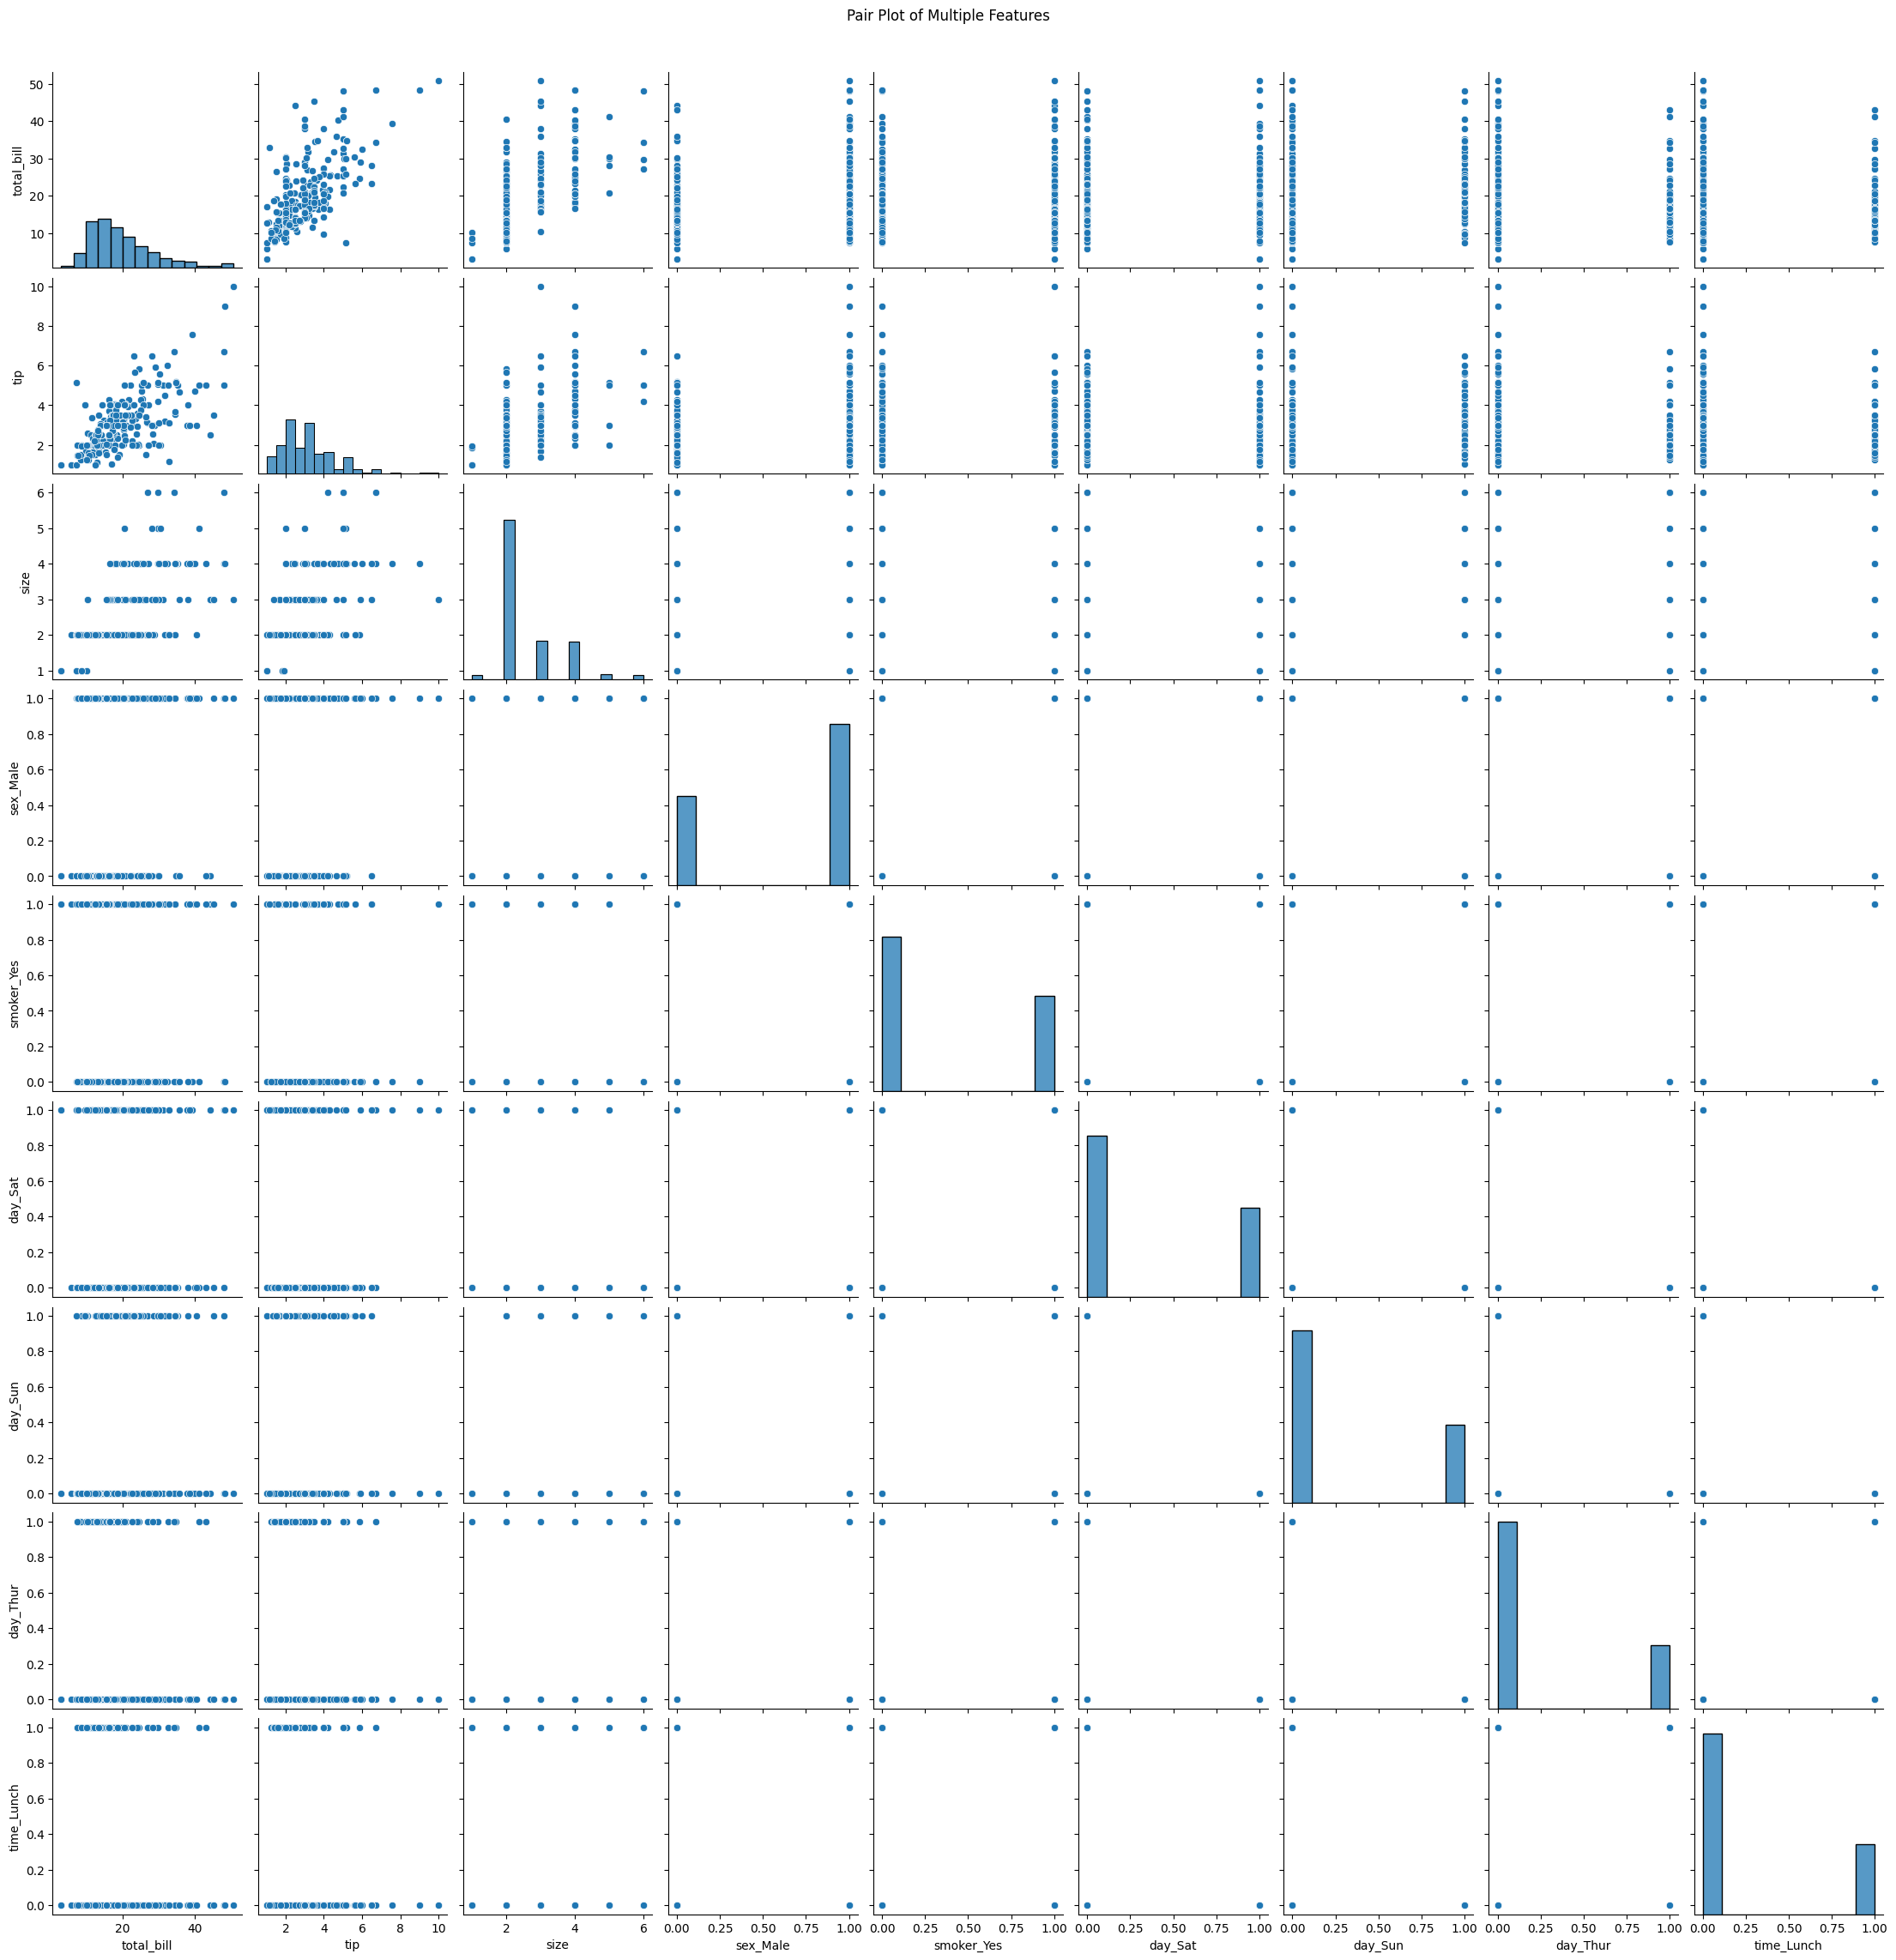

In [72]:
sns.pairplot(df)
plt.suptitle('Pair Plot of Multiple Features', y=1.02)
plt.show()


In [73]:
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow


In [74]:
model = ols('tip ~ total_bill', data=df).fit()
rainbow_statistic, rainbow_p_value = linear_rainbow(model)

print(f'Rainbow test statistic: {rainbow_statistic}, p-value: {rainbow_p_value}')
if rainbow_p_value < 0.05:
    print("Significant evidence of non-linearity (p < 0.05)")
else:
    print("No significant evidence of non-linearity (p >= 0.05)")

Rainbow test statistic: 1.2291480226129028, p-value: 0.1291192152551375
No significant evidence of non-linearity (p >= 0.05)


In [75]:
X = df[['total_bill']]
y = df['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [76]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)


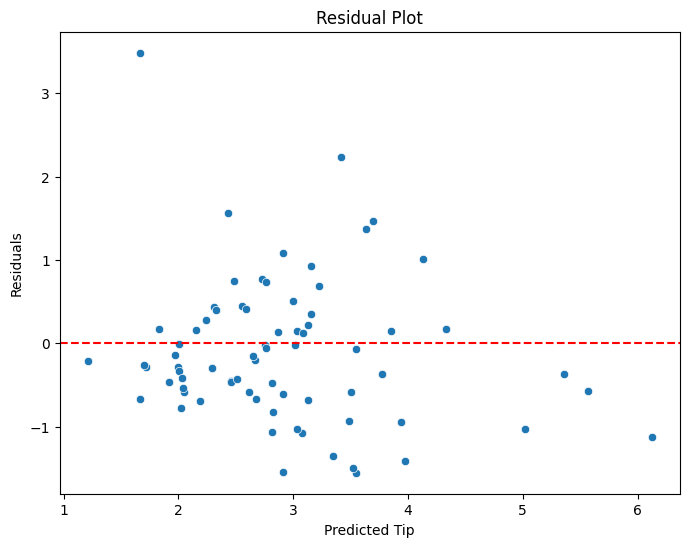

In [77]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Tip')
plt.ylabel('Residuals')
plt.show()

In [78]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



In [79]:
print(f"Linear Regression Performance:\nMAE: {mae:.2f}, MSE: {mse:.2f}, R2 Score: {r2:.2f}")


Linear Regression Performance:
MAE: 0.66, MSE: 0.75, R2 Score: 0.43


In [80]:
from sklearn.ensemble import RandomForestRegressor


In [81]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [82]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)


In [83]:
print(f"\nRandom Forest Performance:\nMAE: {mae_rf:.2f}, MSE: {mse_rf:.2f}, R2 Score: {r2_rf:.2f}")



Random Forest Performance:
MAE: 0.81, MSE: 1.03, R2 Score: 0.22


In [84]:
if r2_rf > r2:
    print("Random Forest model performed better than Linear Regression, indicating a potential non-linear trend.")
else:
    print("Linear Regression performed adequately, suggesting a primarily linear relationship.")

Linear Regression performed adequately, suggesting a primarily linear relationship.


In [85]:
best_model = max(model_performance, key=lambda k: model_performance[k]["R2 Score"])
print(f"The best model based on R2 Score is: {best_model} with R2 Score: {model_performance[best_model]['R2 Score']:.2f}")

The best model based on R2 Score is: Lasso Regression with R2 Score: 0.41
